In [120]:
import warnings
warnings.filterwarnings('ignore')

In [121]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('max_info_columns', 500)
pd.set_option('max_info_rows', 500)

# Step 1: Data Understanding and EDA

In [122]:
df = pd.read_csv("train.csv")

In [123]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [124]:
df.shape

(1460, 81)

In [125]:
# Dropping Duplicate Records

df = df.drop_duplicates()

In [126]:
df.shape

(1460, 81)

<font color='blue'>
There are no Duplicates

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               int64
MSSubClass       int64
MSZoning         object
LotFrontage      float64
LotArea          int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1       int64
BsmtFinType2     object
BsmtFinSF2       int64
BsmtUnfSF   

In [128]:
# Missing values percentage

df_missing_values_perc = round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending = False)
df_missing_values_perc = df_missing_values_perc.reset_index()
df_missing_values_perc.columns = ['Features','Total_missing_values']
df_missing_values_perc

,Features,Total_missing_values
0,PoolQC,99.52
1,MiscFeature,96.30
2,Alley,93.77
3,Fence,80.75
4,FireplaceQu,47.26
5,LotFrontage,17.74
6,GarageCond,5.55
7,GarageType,5.55
8,GarageYrBlt,5.55
9,GarageFinish,5.55


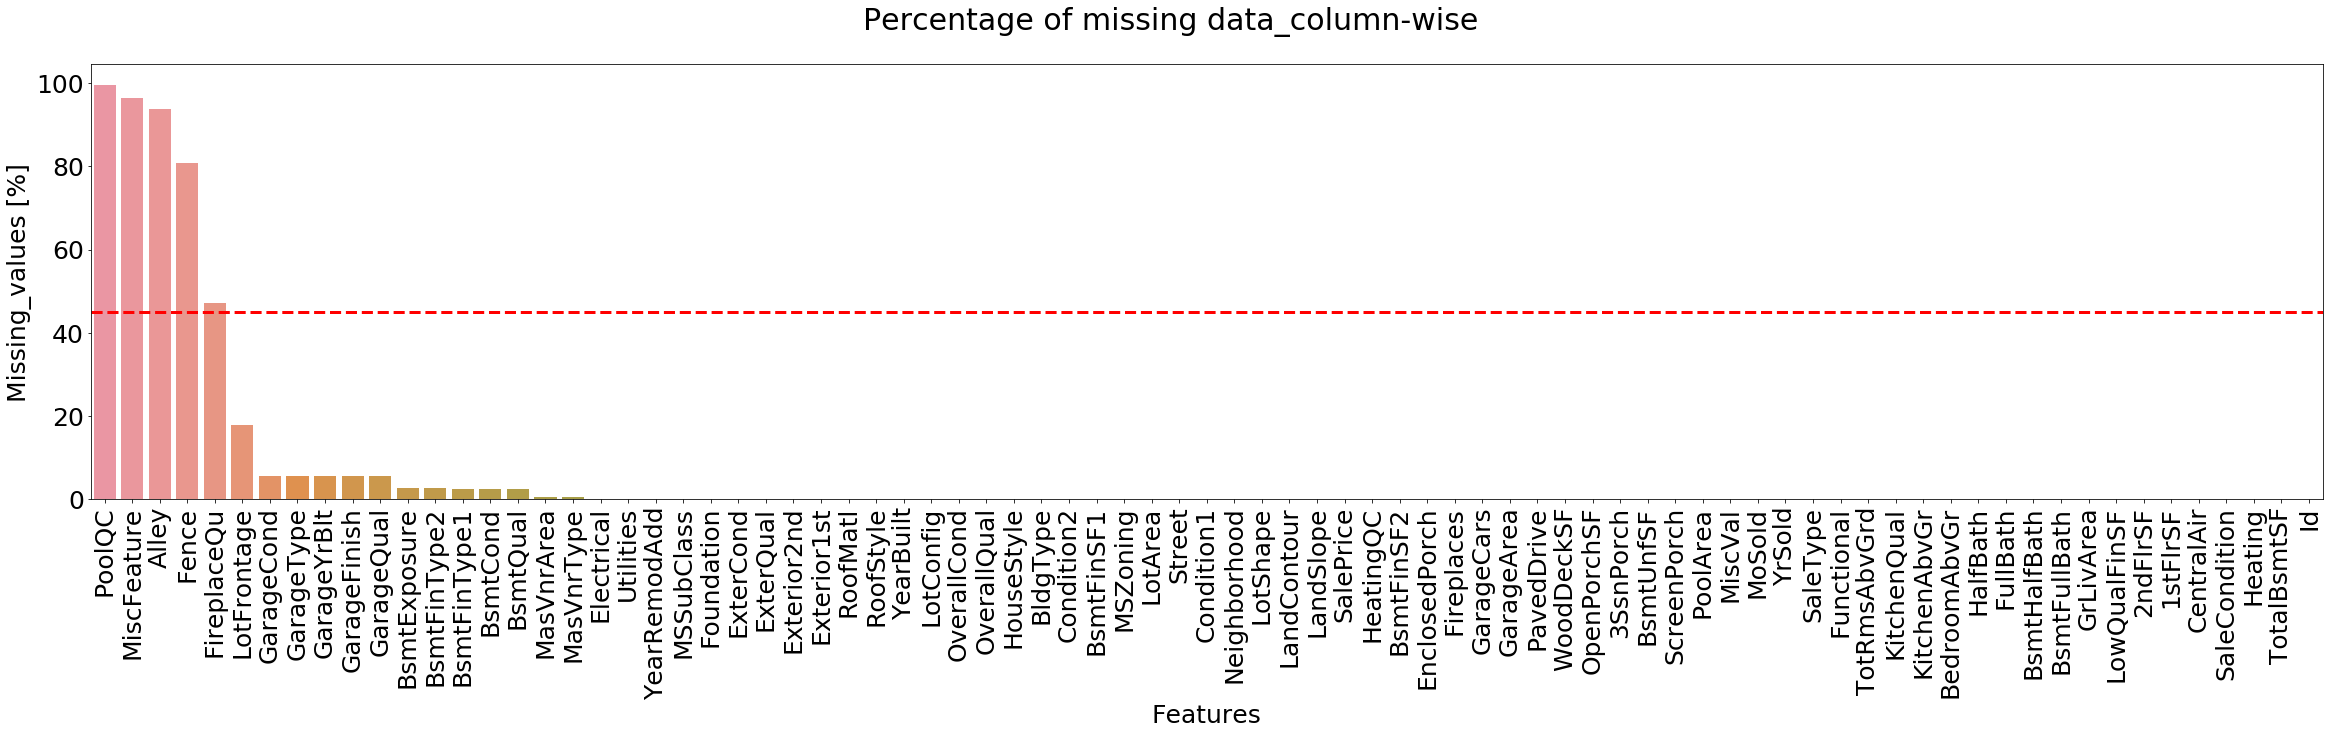

In [129]:
# plot the original data set missing values percentage and plot horizontal line with 45% missing value percentage
plt.figure(figsize = (40,8))
fig = sns.barplot(x = 'Features', y = 'Total_missing_values', data = df_missing_values_perc)
plt.axhline(y = 45, color = 'r', linestyle = '--',linewidth = 3.0)
plt.xticks(rotation=90)
plt.suptitle('Percentage of missing data_column-wise', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Missing_values [%]',fontsize = 25)
plt.xlabel('Features',fontsize = 25)
plt.show()

In [130]:
# Droping the columns having missing values more than 45%

drop_list = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']

df = df.drop(drop_list,axis=1)

In [131]:
df.shape

(1460, 76)

In [132]:
# Checking the missing Percentages for imputation once again

round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending = False)

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
TotalBsmtSF       0.00
BsmtFinSF2        0.00
EnclosedPor

### Analysing the Missing value Columns for Imputation

In [133]:
df.LotFrontage.describe(percentiles = [0.25,0.5,0.75,0.90,0.95,0.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

<font color = 'blue'>
  
  We can clearly see Outliers here, hence imputing with Mean is not a good idea. Hence imputing with median.

In [134]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)

In [135]:
df.LotFrontage.describe(percentiles = [0.25,0.5,0.75,0.90,0.95,0.99])

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64

<font color = 'blue'>

We don't see any big change in Mean and Standard deviation after imputaion

In [136]:
df['GarageFinish'].fillna(df['GarageFinish'] == 'No_Garage_F', inplace=True)
df['GarageType'].fillna(df['GarageType'] == 'No_Garage_T',inplace =True)
df['GarageCond'].fillna(df['GarageCond']== 'No_Garage_C', inplace = True)
df['GarageQual'].fillna(df['GarageQual']== 'No_Garage_Q', inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt']== 9999.000000, inplace = True)
df['BsmtExposure'].fillna(df['BsmtExposure']== 'No_Bsmt_E', inplace = True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'] == 'No_Bsmt_F2', inplace = True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'] == 'No_Bsmt_F1', inplace = True)
df['BsmtCond'].fillna(df['BsmtCond'] == 'No_Bsmt_C', inplace = True)
df['BsmtQual'].fillna(df['BsmtQual'] == 'No_Bsmt_Q', inplace = True)

In [137]:
df.GarageYrBlt = df.GarageYrBlt.astype(int)

In [138]:
# Dropping rows which has less than 2%

df = df.dropna(axis=0) 

In [139]:
# There are no missing values

round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending = False)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
SaleCondition    0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

### Feature Engineering

In [140]:
# Among Exterior1st and Exterior2nd, we can drop one column as most of the values are same

df = df.drop('Exterior2nd',axis=1)


#Among BsmtFinType1 and BsmtFinType2, we can drop one column as most of the values are same

df = df.drop('BsmtFinType1',axis=1)


#Among Condition1 and Condition2, we can drop one column as most of the values are same

df = df.drop('Condition1',axis=1)


# Dropping below columns as there is no much significance in model building

df = df.drop(['YearRemodAdd','GarageYrBlt','MoSold','MiscVal'],axis=1)

In [141]:
# Total Number of Bathrooms

df['TotalBaths'] = ((df['BsmtFullBath']) + 
                            (df['FullBath']) +
                            (df['BsmtHalfBath']/2) +
                            (df['HalfBath']/2))

In [142]:
# Total area of a house
df['TotalSF'] = (df['TotalBsmtSF'] + 
                         df['1stFlrSF'] +
                         df['2ndFlrSF'])

In [143]:
# As we have derived Total Number of Bathrooms and area of a house, dropping the base columns

df = df.drop(['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis = 1)

In [144]:
df['House_Age'] = df['YrSold']-df['YearBuilt']

In [145]:
# As we have derived the Age of the house, dropping the base columns

df = df.drop(['YearBuilt','YrSold'],axis=1)

In [146]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,TotalBaths,TotalSF,House_Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,706,Unf,0,150,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,WD,Normal,208500,3.5,2566,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,978,Unf,0,284,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,WD,Normal,181500,2.5,2524,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,486,Unf,0,434,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,WD,Normal,223500,3.5,2706,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Gd,No,216,Unf,0,540,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,WD,Abnorml,140000,2.0,2473,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,655,Unf,0,490,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,WD,Normal,250000,3.5,3343,8


# Step 2: Data Visualization

In [147]:
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [148]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'SalePrice', 'TotalBaths', 'TotalSF', 'House_Age'],
      dtype='object')

In [149]:
df.select_dtypes(include='float64').columns

Index(['LotFrontage', 'MasVnrArea', 'TotalBaths'], dtype='object')

### Listing Numeric Columns

In [150]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [151]:
# Although above columns are numeric, there are categorical variables hence dropping those along with ID

df_numeric = df_numeric.drop(['Id','MSSubClass','OverallQual','OverallCond','BedroomAbvGr',
                              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','LowQualFinSF',
                             'PoolArea'], axis=1)

Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

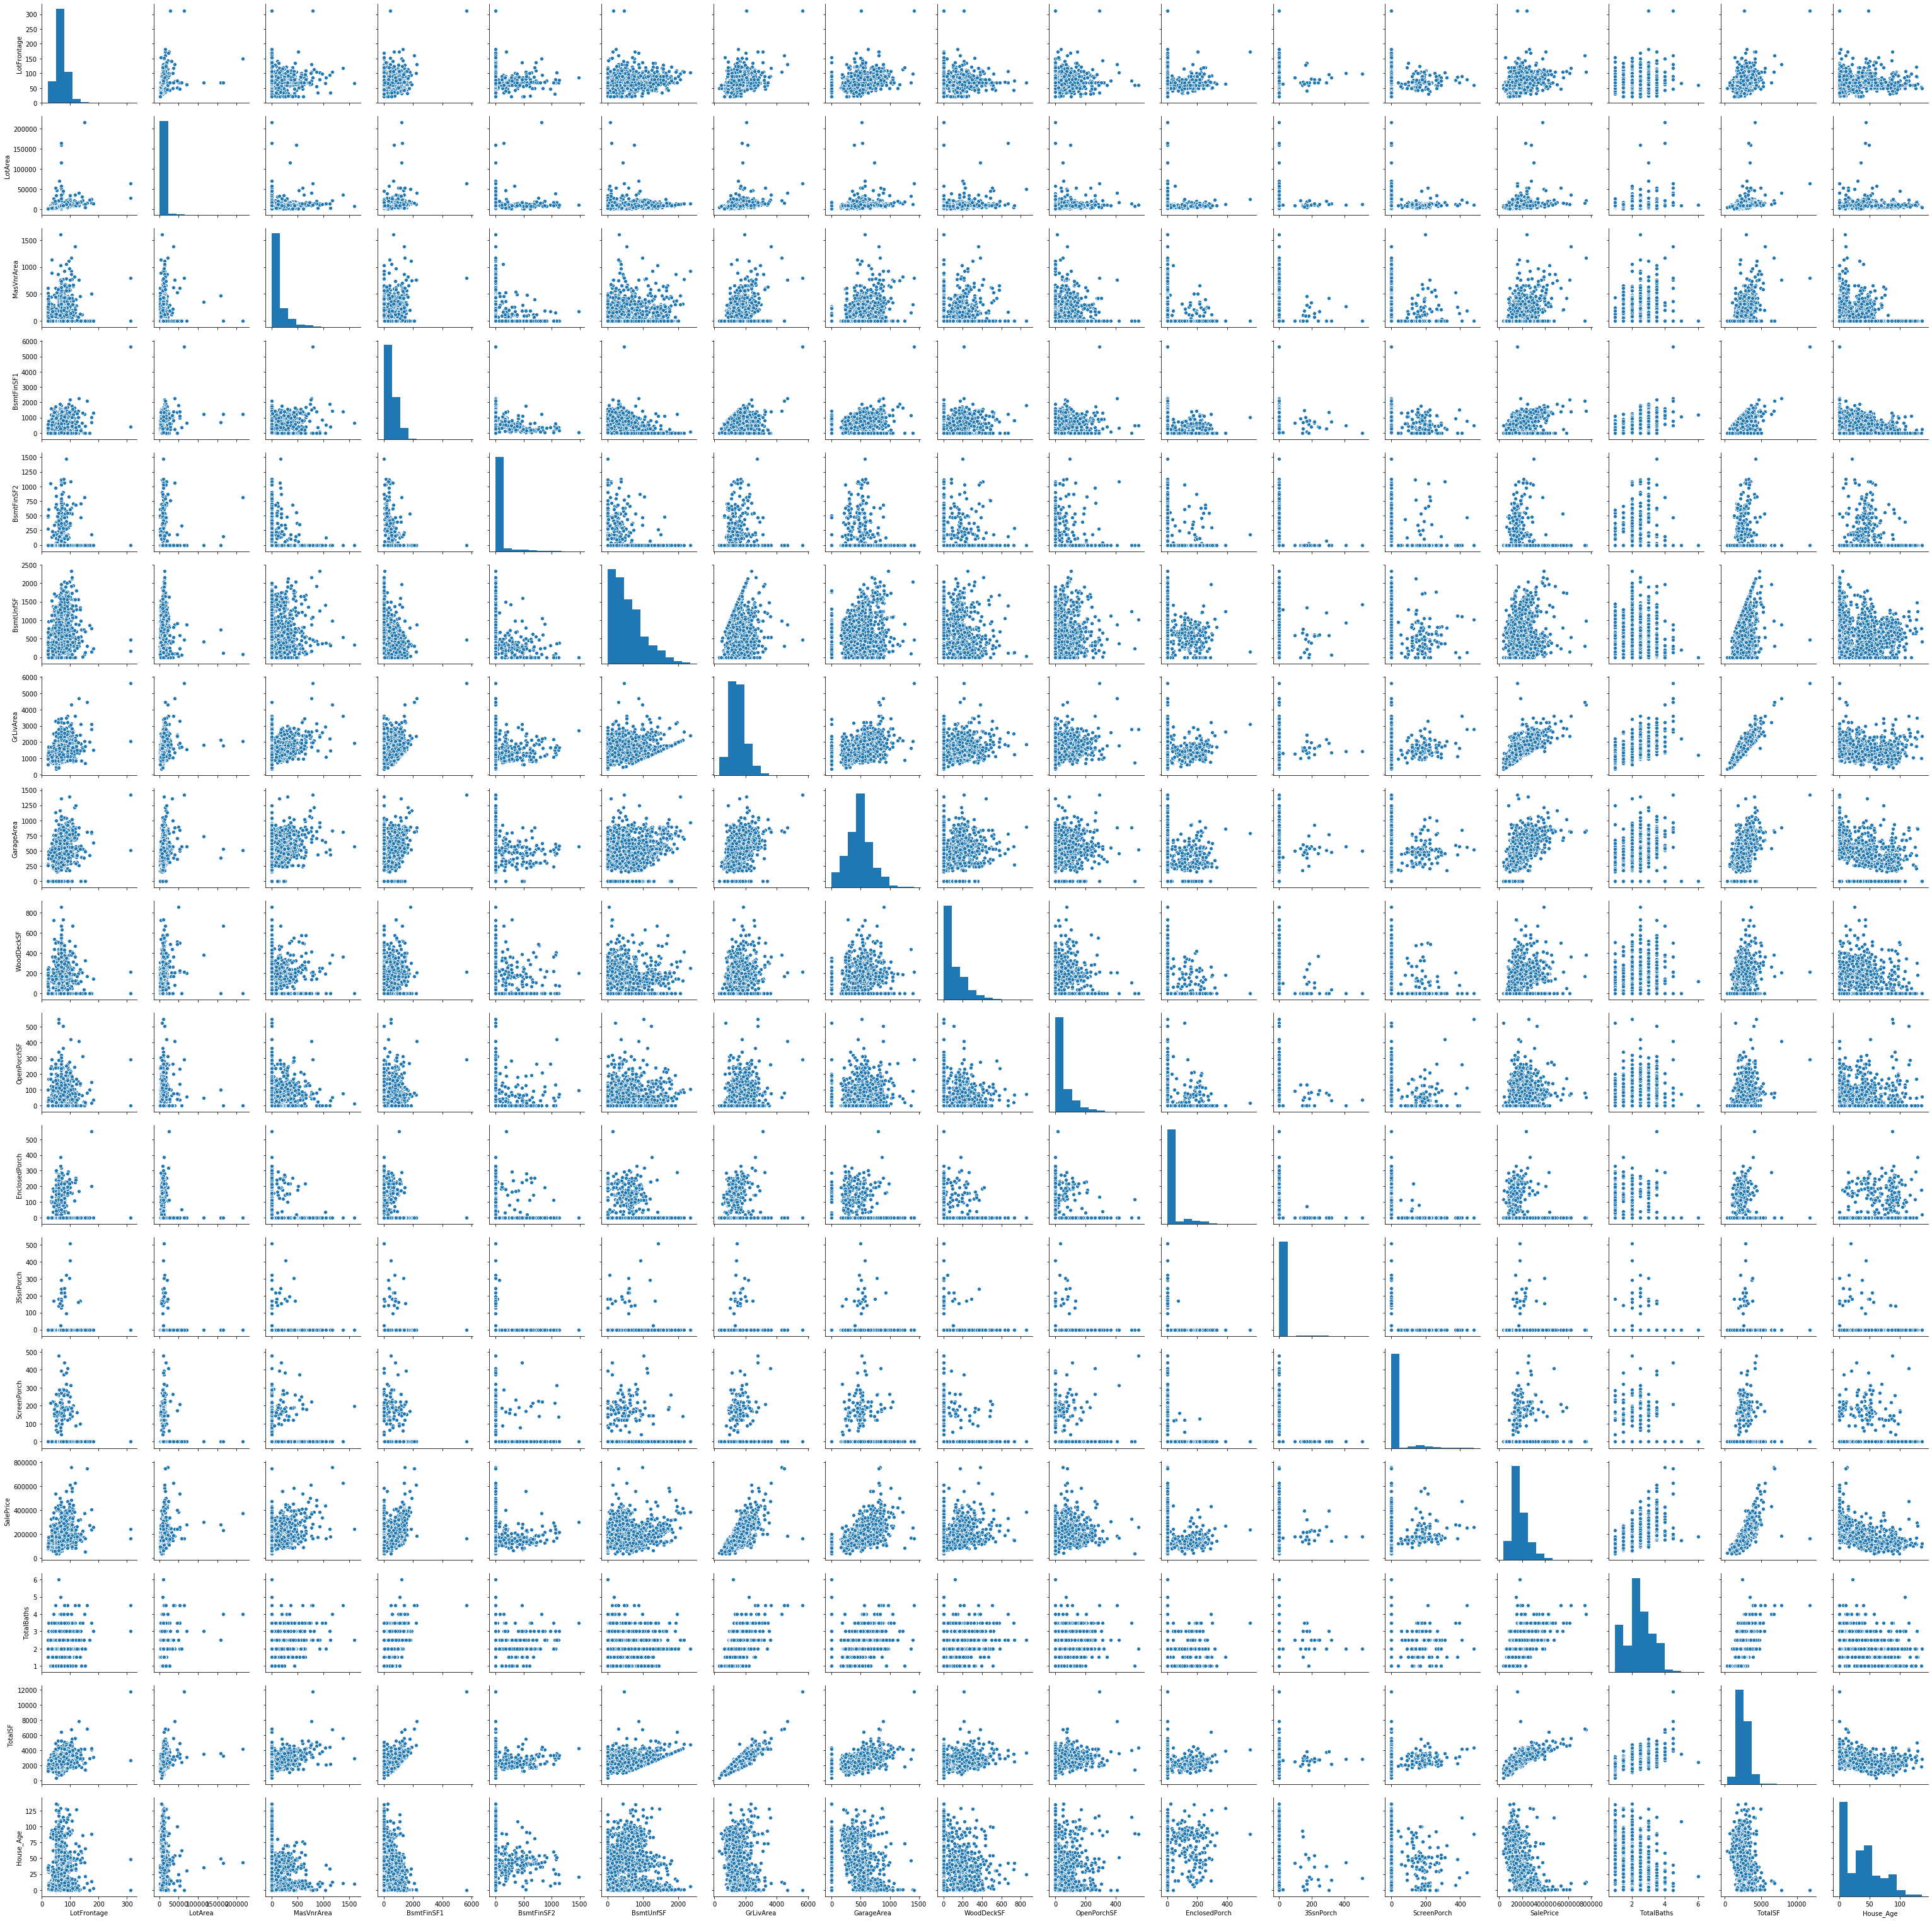

In [152]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(df_numeric)
plt.show()

In [153]:
# correlation matrix
cor = df_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,TotalBaths,TotalSF,House_Age
LotFrontage,1.000000,0.304694,0.179537,0.215778,0.042811,0.121921,0.368035,0.323181,0.074495,0.134766,0.010728,0.062188,0.037974,0.333206,0.200527,0.427220,-0.115856
LotArea,0.304694,1.000000,0.104141,0.213081,0.111674,-0.004250,0.261152,0.180767,0.173170,0.086278,-0.023114,0.020568,0.043498,0.264668,0.203041,0.304839,-0.016253
MasVnrArea,0.179537,0.104141,1.000000,0.264469,-0.072443,0.114298,0.390818,0.372990,0.159754,0.125461,-0.110363,0.018752,0.061367,0.477486,0.319757,0.448342,-0.316195
BsmtFinSF1,0.215778,0.213081,0.264469,1.000000,-0.049498,-0.496605,0.205944,0.295374,0.205447,0.107279,-0.105887,0.026926,0.063139,0.383995,0.479306,0.413106,-0.249061
BsmtFinSF2,0.042811,0.111674,-0.072443,-0.049498,1.000000,-0.209806,-0.008956,-0.017641,0.067684,0.004155,0.036680,-0.030211,0.088430,-0.010350,0.053796,0.049982,0.048934
BsmtUnfSF,0.121921,-0.004250,0.114298,-0.496605,-0.209806,1.000000,0.240770,0.183865,-0.004180,0.130046,-0.003787,0.020825,-0.012585,0.215707,-0.104074,0.374328,-0.151750
GrLivArea,0.368035,0.261152,0.390818,0.205944,-0.008956,0.240770,1.000000,0.469396,0.247992,0.330746,0.005757,0.020982,0.102451,0.710073,0.593920,0.874477,-0.200873
GarageArea,0.323181,0.180767,0.372990,0.295374,-0.017641,0.183865,0.469396,1.000000,0.225438,0.238781,-0.121697,0.035385,0.052071,0.622484,0.451644,0.563969,-0.479310
WoodDeckSF,0.074495,0.173170,0.159754,0.205447,0.067684,-0.004180,0.247992,0.225438,1.000000,0.058943,-0.125481,-0.033004,-0.074734,0.324658,0.290289,0.285363,-0.225648
OpenPorchSF,0.134766,0.086278,0.125461,0.107279,0.004155,0.130046,0.330746,0.238781,0.058943,1.000000,-0.091063,-0.005458,0.075748,0.311244,0.285641,0.341046,-0.187901


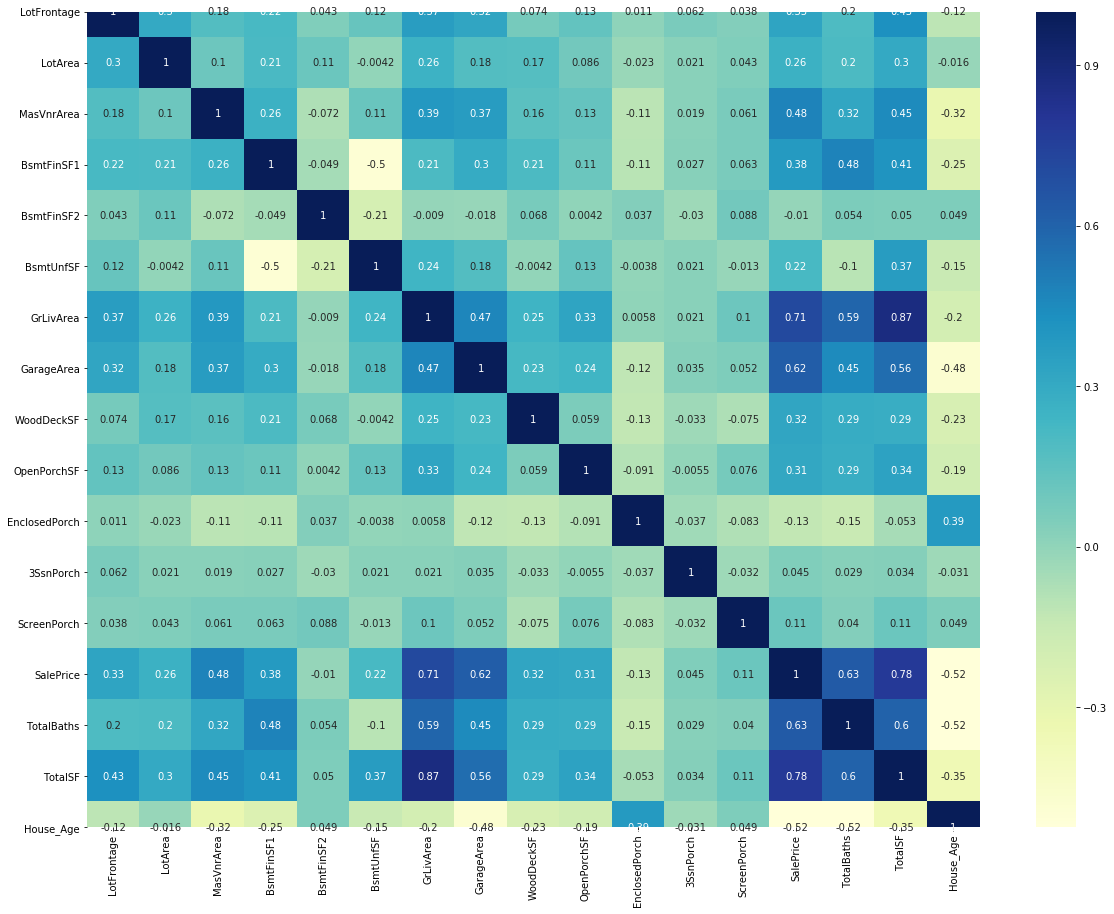

In [154]:
# plotting correlations on a heatmap

plt.figure(figsize=(20,15))

sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Observations:
        * Sales Price has high correlations with 
                . TotalSF
                . GrLivArea
                . TotalBaths
                . GarageArea
                
        * Multicollinearity could be the reason for high correlation between following the variables
                . TotalSF Vs GrLivArea
                . TotalBaths Vs TotalSF            

In [155]:
high_corr = df_numeric[['SalePrice','TotalSF','GrLivArea','TotalBaths','GarageArea']]

<Figure size 432x216 with 0 Axes>

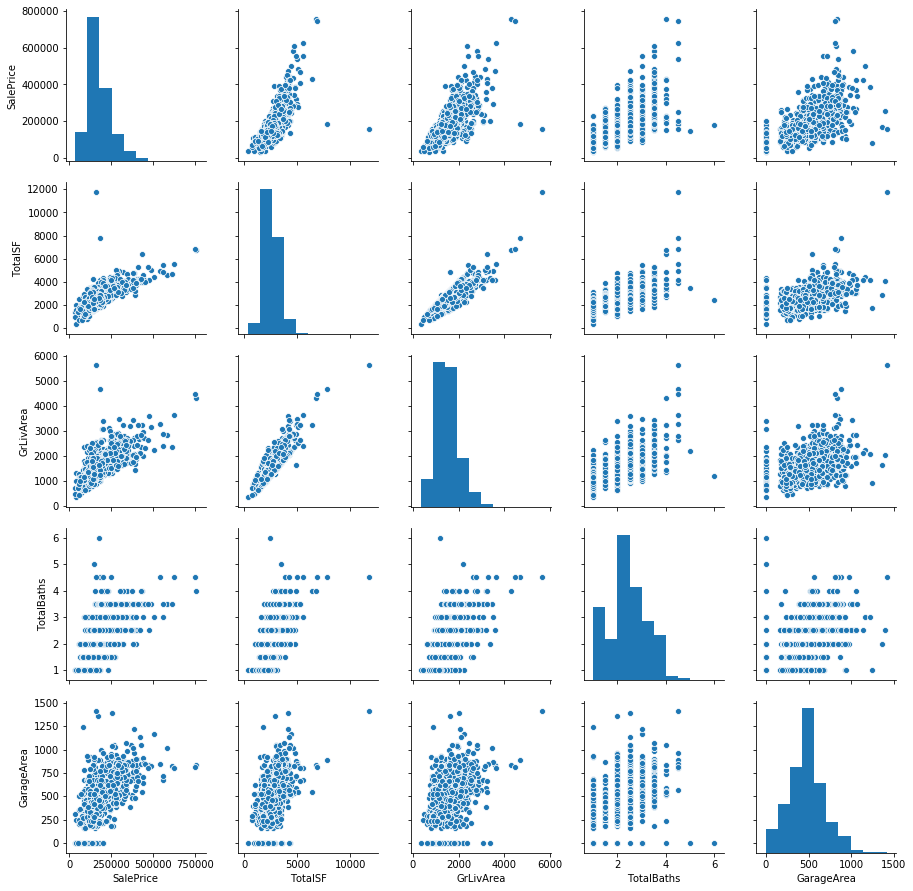

In [156]:
# paiwise scatter plot

plt.figure(figsize=(6, 3))
sns.pairplot(high_corr)
plt.show()

## Univariate Analysis

Let's perform univariate analysis on Target variable - SalePrice.

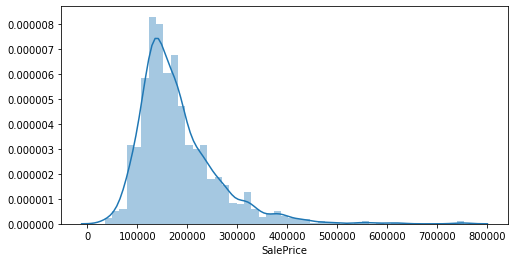

In [157]:
plt.figure(figsize = (8,4))
sns.distplot(df['SalePrice'])
plt.show()

Observations:
    1. Majority of the houses are between 50000 and 250000
    2. There are few houses which are very costly (>400000)




Skewness in the data is also high. Hence Outliers need to be treated.

# Outliers in Categorical Variables

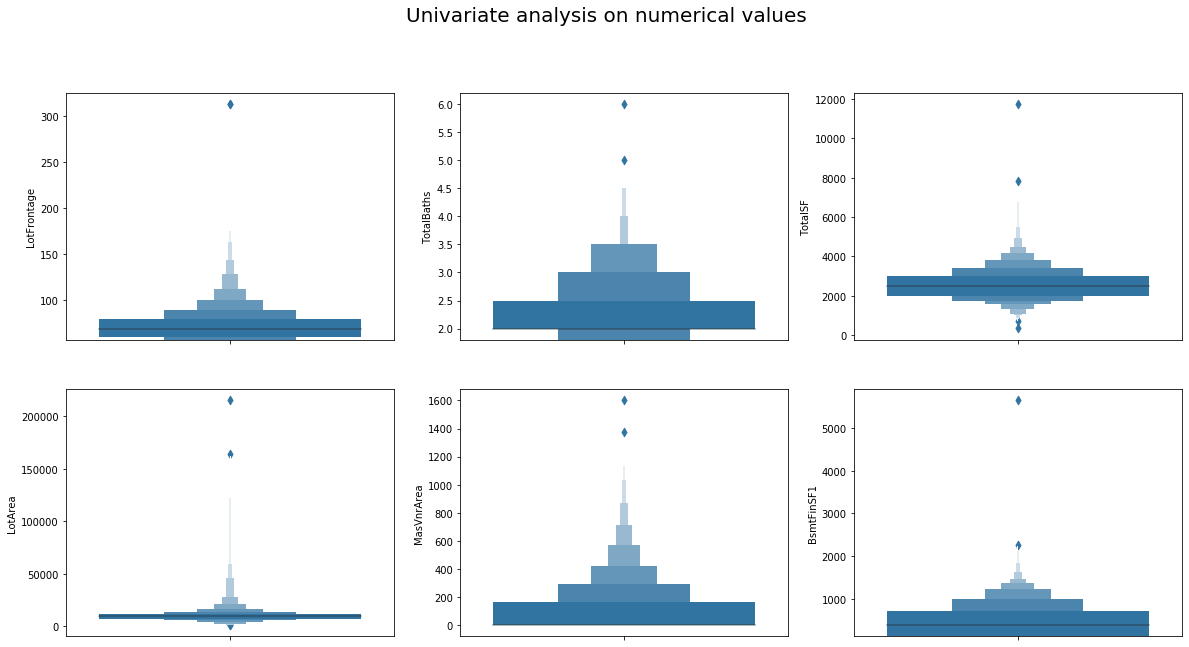

In [158]:
# plot the boxenplots to check the numerical distribution after outliers treatments 
fig = plt.figure(figsize=(20, 10)) 
fig.suptitle('Univariate analysis on numerical values',fontsize=20,x =0.5, y=1)

plt.subplot(231)
sns.boxenplot(y = 'LotFrontage', data = df)

plt.subplot(232)
sns.boxenplot(y = 'TotalBaths', data = df)

plt.subplot(233)
sns.boxenplot(y = 'TotalSF', data = df)

plt.subplot(234)
sns.boxenplot(y = 'LotArea', data = df)

plt.subplot(235)
sns.boxenplot(y = 'MasVnrArea', data = df)

plt.subplot(236)
sns.boxenplot(y = 'BsmtFinSF1', data = df)

plt.show()

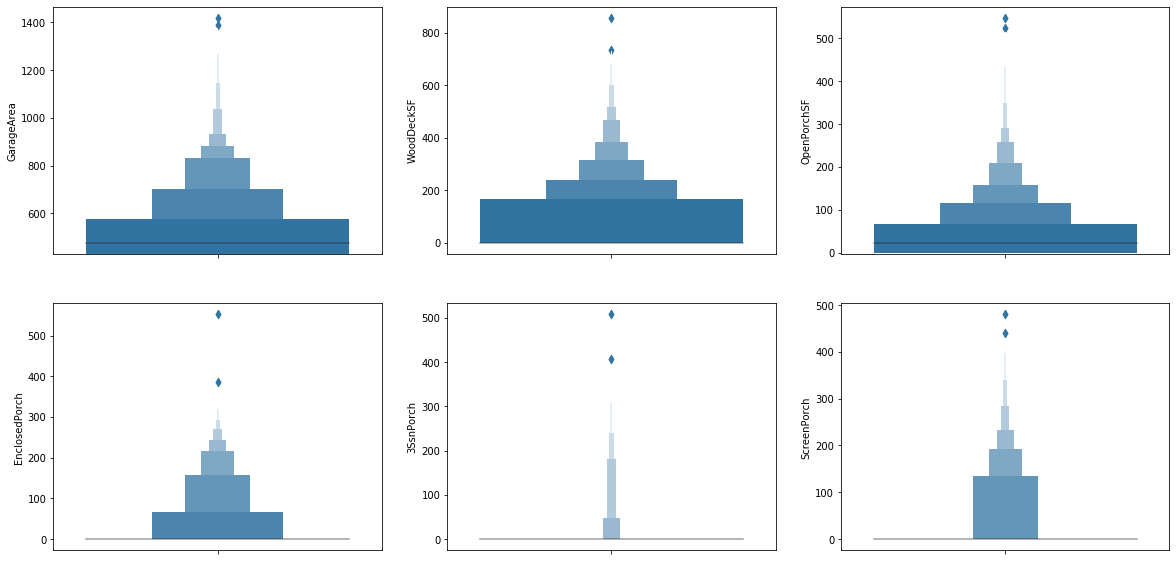

In [159]:
fig = plt.figure(figsize=(20, 10)) 
plt.subplot(231)
sns.boxenplot(y = 'GarageArea', data = df)

plt.subplot(232)
sns.boxenplot(y = 'WoodDeckSF', data = df)

plt.subplot(233)
sns.boxenplot(y = 'OpenPorchSF', data = df)

plt.subplot(234)
sns.boxenplot(y = 'EnclosedPorch', data = df)

plt.subplot(235)
sns.boxenplot(y = '3SsnPorch', data = df)

plt.subplot(236)
sns.boxenplot(y = 'ScreenPorch', data = df)

plt.show()

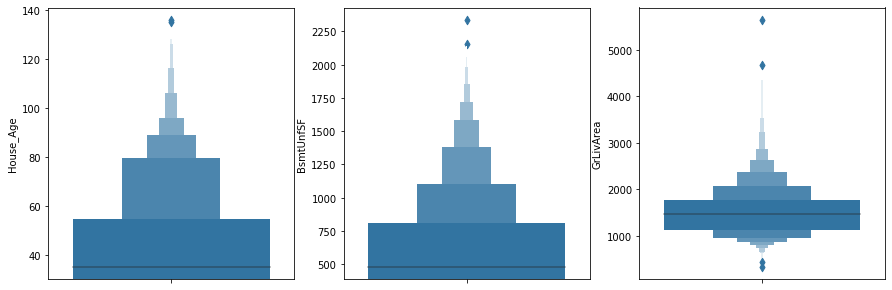

In [160]:
fig = plt.figure(figsize=(15, 5)) 
plt.subplot(131)
sns.boxenplot(y = 'House_Age', data = df)

plt.subplot(132)
sns.boxenplot(y = 'BsmtUnfSF', data = df)

plt.subplot(133)
sns.boxenplot(y = 'GrLivArea', data = df)
plt.show()

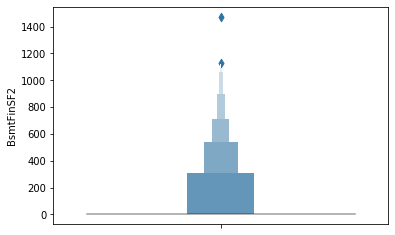

In [161]:
sns.boxenplot(y = 'BsmtFinSF2', data = df)
plt.show()

### Outlier Treatment

In [162]:
# Removing Statistical Outliers

# Outlier treatment for  BsmtFinSF2

Q1 = df.BsmtFinSF2.quantile(0.1)
Q3 = df.BsmtFinSF2.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.BsmtFinSF2 >= Q1) & (df.BsmtFinSF2 <= Q3)]


# Outlier treatment for  LotFrontage

Q1 = df.LotFrontage.quantile(0.1)
Q3 = df.LotFrontage.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.LotFrontage >= Q1) & (df.LotFrontage <= Q3)]


# Outlier treatment for  TotalBaths

Q1 = df.TotalBaths.quantile(0.1)
Q3 = df.TotalBaths.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.TotalBaths >= Q1) & (df.TotalBaths <= Q3)]


# Outlier treatment for  TotalSF

Q1 = df.TotalSF.quantile(0.1)
Q3 = df.TotalSF.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.TotalSF >= Q1) & (df.TotalSF <= Q3)]


# Outlier treatment for  MasVnrArea

Q1 = df.MasVnrArea.quantile(0.1)
Q3 = df.MasVnrArea.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.MasVnrArea >= Q1) & (df.MasVnrArea <= Q3)]


# Outlier treatment for  BsmtFinSF1

Q1 = df.BsmtFinSF1.quantile(0.1)
Q3 = df.BsmtFinSF1.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.BsmtFinSF1 >= Q1) & (df.BsmtFinSF1 <= Q3)]


# Outlier treatment for  GarageArea

Q1 = df.GarageArea.quantile(0.1)
Q3 = df.GarageArea.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.GarageArea >= Q1) & (df.GarageArea <= Q3)]

# Outlier treatment for  WoodDeckSF

Q1 = df.WoodDeckSF.quantile(0.1)
Q3 = df.WoodDeckSF.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.WoodDeckSF >= Q1) & (df.WoodDeckSF <= Q3)]


# Outlier treatment for  OpenPorchSF

Q1 = df.OpenPorchSF.quantile(0.1)
Q3 = df.OpenPorchSF.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.OpenPorchSF >= Q1) & (df.OpenPorchSF <= Q3)]

# Outlier treatment for  EnclosedPorch

Q1 = df.EnclosedPorch.quantile(0.1)
Q3 = df.EnclosedPorch.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.EnclosedPorch >= Q1) & (df.EnclosedPorch <= Q3)]


# Outlier treatment for  House_Age

Q1 = df.House_Age.quantile(0.1)
Q3 = df.House_Age.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.House_Age >= Q1) & (df.House_Age <= Q3)]


# Outlier treatment for  BsmtUnfSF

Q1 = df.BsmtUnfSF.quantile(0.1)
Q3 = df.BsmtUnfSF.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.BsmtUnfSF >= Q1) & (df.BsmtUnfSF <= Q3)]

 

# Outlier treatment for  GrLivArea

Q1 = df.GrLivArea.quantile(0.1)
Q3 = df.GrLivArea.quantile(0.9)
IQR = Q3 - Q1
df = df[(df.GrLivArea >= Q1) & (df.GrLivArea <= Q3)]


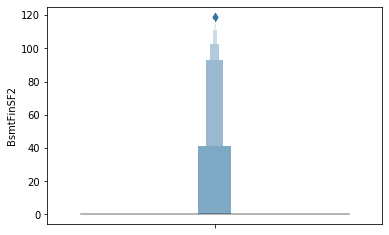

In [163]:
sns.boxenplot(y = 'BsmtFinSF2', data = df)
plt.show()

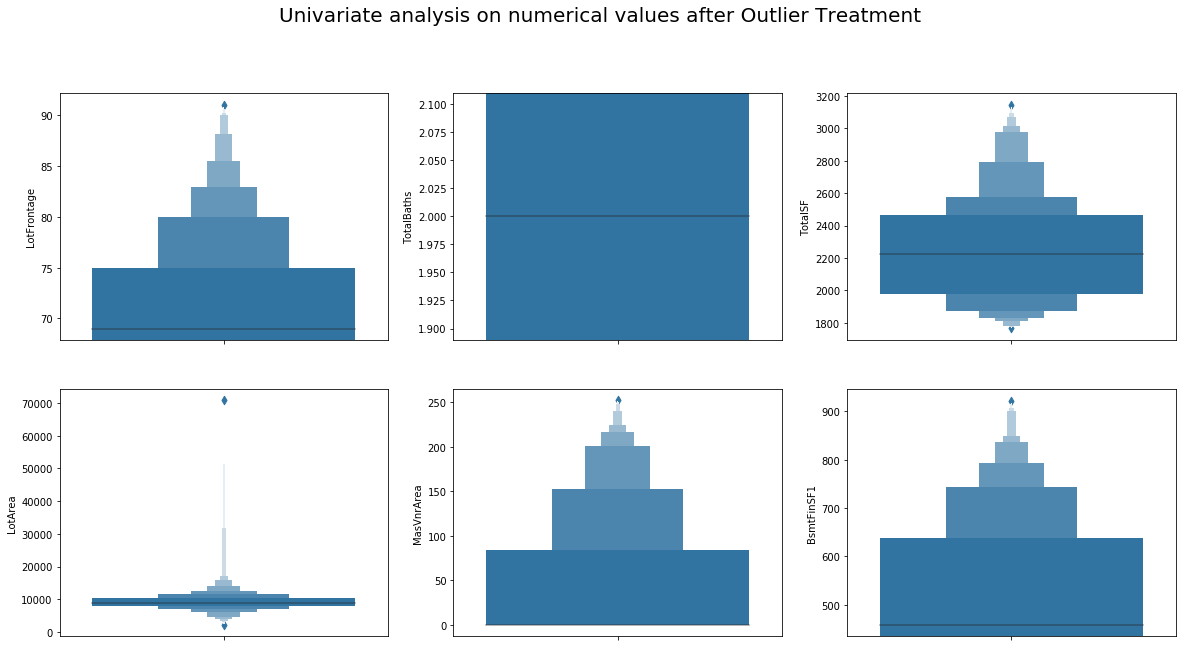

In [164]:
fig = plt.figure(figsize=(20, 10)) 
fig.suptitle('Univariate analysis on numerical values after Outlier Treatment',fontsize=20,x =0.5, y=1)

plt.subplot(231)
sns.boxenplot(y = 'LotFrontage', data = df)

plt.subplot(232)
sns.boxenplot(y = 'TotalBaths', data = df)

plt.subplot(233)
sns.boxenplot(y = 'TotalSF', data = df)

plt.subplot(234)
sns.boxenplot(y = 'LotArea', data = df)

plt.subplot(235)
sns.boxenplot(y = 'MasVnrArea', data = df)

plt.subplot(236)
sns.boxenplot(y = 'BsmtFinSF1', data = df)

plt.show()

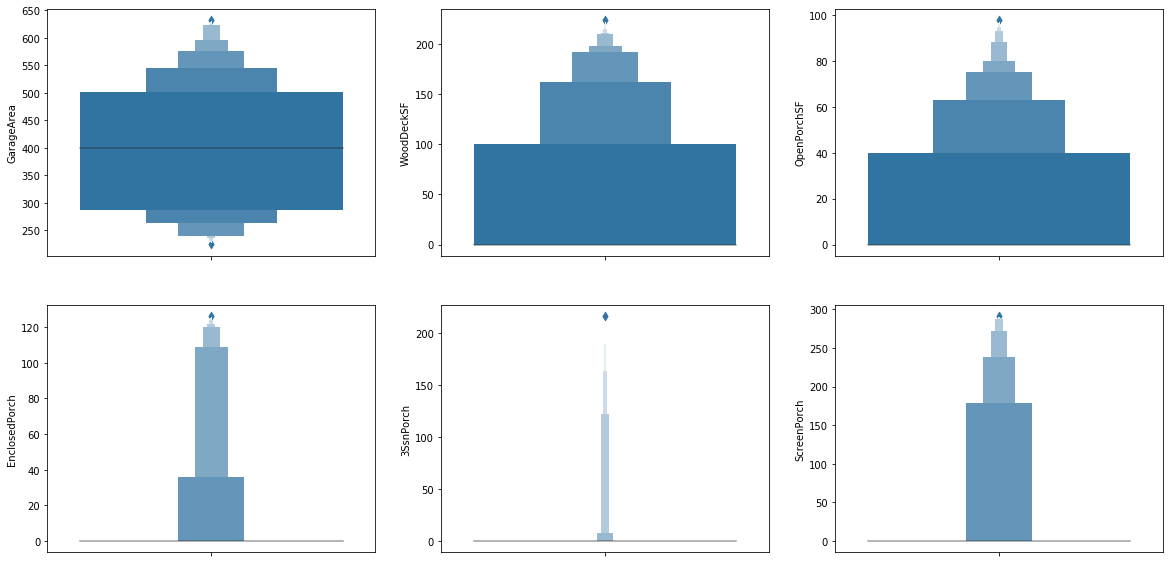

In [165]:
fig = plt.figure(figsize=(20, 10)) 
plt.subplot(231)
sns.boxenplot(y = 'GarageArea', data = df)

plt.subplot(232)
sns.boxenplot(y = 'WoodDeckSF', data = df)

plt.subplot(233)
sns.boxenplot(y = 'OpenPorchSF', data = df)

plt.subplot(234)
sns.boxenplot(y = 'EnclosedPorch', data = df)

plt.subplot(235)
sns.boxenplot(y = '3SsnPorch', data = df)

plt.subplot(236)
sns.boxenplot(y = 'ScreenPorch', data = df)

plt.show()

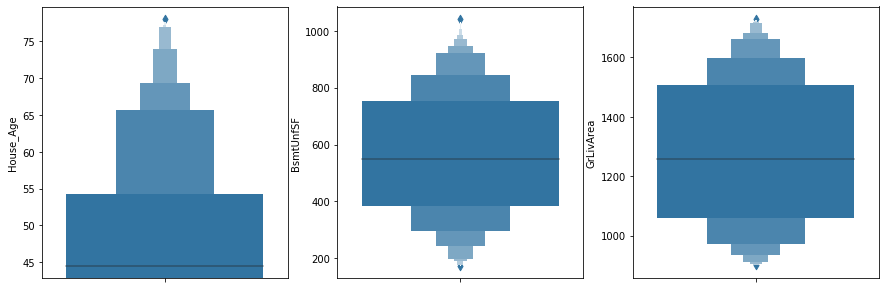

In [166]:
fig = plt.figure(figsize=(15, 5)) 
plt.subplot(131)
sns.boxenplot(y = 'House_Age', data = df)

plt.subplot(132)
sns.boxenplot(y = 'BsmtUnfSF', data = df)

plt.subplot(133)
sns.boxenplot(y = 'GrLivArea', data = df)
plt.show()

# Data Preparation

In [167]:
# Handling Categorical Columns

df['Street'] = df['Street'].apply(lambda x:1 if x == 'Pave' else 0)
df['Utilities'] = df['Utilities'].apply(lambda x:1 if x == 'AllPub' else 0)
df['CentralAir'] = df['CentralAir'].apply(lambda x:1 if x == 'Y' else 0)

In [168]:
df_dummies = df.select_dtypes(include=['object'])
df_dummies.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [169]:
df_dummies = pd.get_dummies(df_dummies,drop_first = True)

In [170]:
df = pd.concat([df,df_dummies],axis=1)

In [171]:
df = df.drop(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],axis=1)

In [172]:
df.shape

(188, 129)

# Splitting the Data into Train and Test

In [173]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [174]:
print(df_train.shape)
print(df_test.shape)

(131, 129)
(57, 129)


### Rescaling the Features
We will use MixMax scaling

In [175]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

In [176]:
train_col_list = df_train.columns
train_col_list

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_TA',
       'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Normal'],
      dtype='object', length=129)

In [177]:
df_train[train_col_list] = scaler.fit_transform(df_train[train_col_list])

In [178]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,TotalBaths,TotalSF,House_Age,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_Tar&Grv,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Typ,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal
count,131.000000,131.000000,131.000000,131.000000,131.0,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,0.489472,0.174225,0.469931,0.110372,0.0,0.0,0.435115,0.461832,0.168484,0.453768,0.029123,0.465723,0.984733,0.0,0.470812,0.419847,0.007634,0.498092,0.267176,0.557252,0.437899,0.213813,0.228618,0.043863,0.011026,0.078723,0.007634,0.343413,0.435115,0.358600,0.479059,0.0,0.885496,0.106870,0.015267,0.656489,0.022901,0.007634,0.931298,0.045802,0.007634,0.007634,0.793893,0.030534,0.015267,0.137405,0.038168,0.061069,0.099237,0.0,0.022901,0.251908,0.007634,0.061069,0.007634,0.045802,0.007634,0.099237,0.061069,0.007634,0.0,0.015267,0.038168,0.0,0.007634,0.038168,0.519084,0.007634,0.206107,0.022901,0.083969,0.786260,0.206107,0.007634,

### Dividing into X and Y sets for model building

In [179]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [180]:
print(X_train.shape)
print(y_train.shape)

(131, 128)
(131,)


In [181]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [182]:
print(X_test.shape)
print(y_test.shape)

(57, 128)
(57,)


## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [183]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [184]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.00312,0.006240,0.00624,0.007643,0.0001,{'alpha': 0.0001},-0.123192,-0.105471,-0.175178,-0.172287,-0.292968,-0.173433,0.065374,28,-0.010643,-0.005273,-0.004681,-0.006662,-0.004775,-0.006407,0.002233
1,0.00624,0.007642,0.00312,0.006240,0.001,{'alpha': 0.001},-0.096288,-0.100287,-0.130107,-0.157216,-0.159042,-0.128342,0.026854,27,-0.011131,-0.005523,-0.004770,-0.006933,-0.007178,-0.007107,0.002200
2,0.00624,0.007642,0.00312,0.006240,0.01,{'alpha': 0.01},-0.080331,-0.087463,-0.093871,-0.112406,-0.092263,-0.093168,0.010684,24,-0.012533,-0.006270,-0.006620,-0.008932,-0.009674,-0.008806,0.002275
3,0.00624,0.007642,0.00312,0.006240,0.05,{'alpha': 0.05},-0.072524,-0.067943,-0.077807,-0.086191,-0.064606,-0.073805,0.007588,22,-0.014710,-0.008093,-0.009605,-0.011843,-0.013262,-0.011503,0.002397
4,0.00624,0.007642,0.00000,0.000000,0.1,{'alpha': 0.1},-0.065984,-0.064668,-0.071493,-0.079889,-0.055930,-0.067580,0.007890,20,-0.016394,-0.009522,-0.011399,-0.013425,-0.015244,-0.013197,0.002498


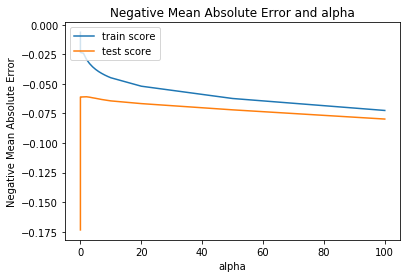

In [185]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [186]:
ridge_cv.best_score_

-0.06094098057618045

In [187]:
ridge_cv.best_params_

{'alpha': 2.0}

<font color ='red'>

### Optmial Value of lambda for ridge regression is 2

In [188]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01131458, -0.02861193, -0.01859191,  0.04799342,  0.        ,
        0.        ,  0.06502796,  0.08332963, -0.02954276,  0.03796198,
        0.022925  ,  0.00541614,  0.0151697 ,  0.        ,  0.07626911,
       -0.01897461, -0.01844172,  0.04096354,  0.007867  ,  0.02805239,
       -0.00277777,  0.0050506 ,  0.0215171 ,  0.01514728, -0.01123689,
        0.03054308,  0.0509494 ,  0.05390921,  0.07698909, -0.0303613 ,
        0.        ,  0.00210096, -0.00791008,  0.01800186, -0.02414104,
        0.03588157,  0.05756373, -0.02167152,  0.0040987 , -0.0206959 ,
        0.01197268, -0.01839371,  0.06088187,  0.05337157, -0.00320652,
        0.03732314, -0.01875604, -0.00060967,  0.        ,  0.00872212,
       -0.02869396, -0.0226195 , -0.03273825,  0.01197268, -0.04756595,
       -0.0062555 ,  0.01878582, -0.0144836 ,  0.00580911,  0.        ,
        0.00595117, -0.05137346,  0.        ,  0.00580911, -0.01313819,
        0.01145235,  0.01866451,  0.0268737 , -0.00843963,  0.00

In [189]:
coef_ridge = pd.Series(ridge.coef_, index = X_train.columns)
var_selected_ridge = coef_ridge.count()
print('Ridge has selected {} variables'.format(var_selected_ridge))

Ridge has selected 128 variables


In [190]:
# Best variables predicting housing prices as per Lasso Regression
main_coef_ridge = pd.concat([coef_ridge.sort_values().head(10),
                       coef_ridge.sort_values().tail(10)])

main_coef_ridge.sort_values(ascending=False)

OverallCond             0.083330
TotalSF                 0.076989
GrLivArea               0.076269
OverallQual             0.065028
LandSlope_Mod           0.060882
RoofMatl_WdShngl        0.057564
LandContour_Low         0.057564
SaleCondition_Normal    0.054349
TotalBaths              0.053909
Neighborhood_ClearCr    0.053372
ExterCond_Gd           -0.028727
MasVnrArea             -0.029543
House_Age              -0.030361
Neighborhood_NWAmes    -0.032738
GarageType_Basment     -0.032779
Exterior1st_WdShing    -0.045681
Neighborhood_OldTown   -0.047566
BsmtExposure_No        -0.050151
BldgType_2fmCon        -0.051373
SaleCondition_Family   -0.069180
dtype: float64

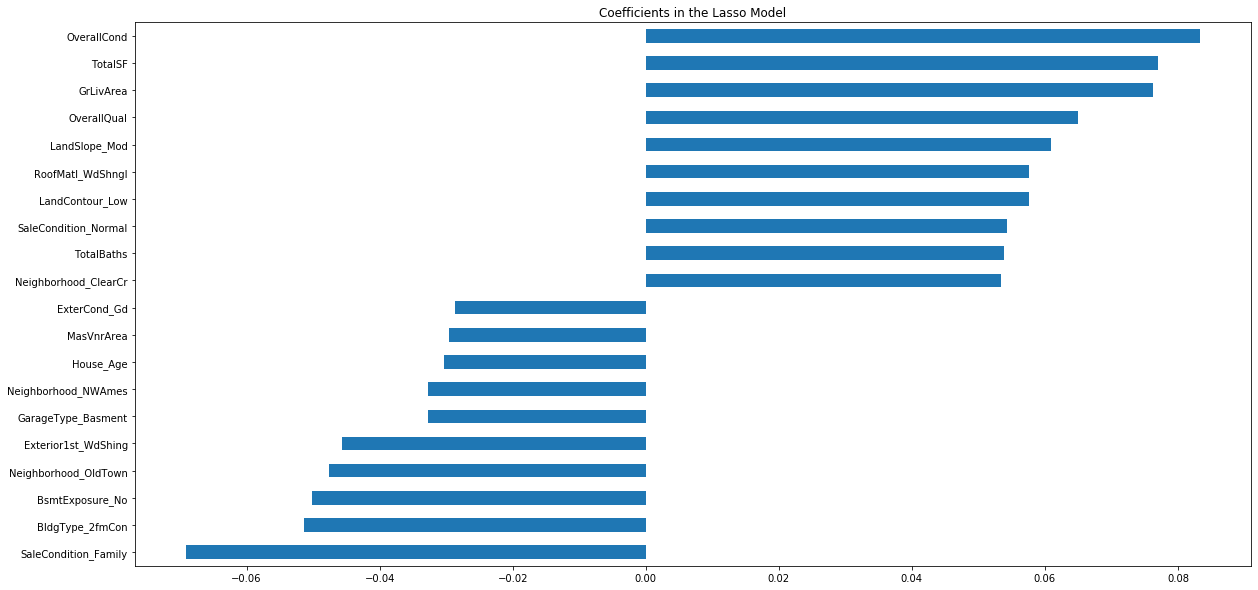

In [191]:
# Plotting the variables
plt.figure(figsize = (20,10))

main_coef_ridge.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

plt.show()

<font color = 'blue'>

## Inputs from Ridge Regression

Most significant in House price prediction. 


With the increase of below Variables, sales price increases 

    1. Top Priority is given for Overall Cond     
        . 10 Very Excellent
        . 9 Excellent
        . 8 Very Good           
    2. Total Square Feet of House
    3. GrLivArea -  Above grade (ground) living area square feet
    4. OverallQual 
        . 10 Very Excellent
        . 9 Excellent
        . 8 Very Good 
    5. Landslope Moderate


With the increase of below variables, sales price decreases
    
    1. SaleCondition Family -  Sale between family members
    2. BldgType2FmCon - Two-family Conversion; originally built as one-family dwelling
    3. BsmtExposure_No
    4. Neighborhood OldTown
    5. Exterior1st_WdShing - Wood Shingles
    

## Lasso

In [192]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1 ]}

In [193]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [194]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01248,0.006240,0.00000,0.00000,0.0001,{'alpha': 0.0001},-0.061797,-0.058568,-0.068708,-0.068552,-0.050435,-0.061614,0.006797,3,-0.018146,-0.010753,-0.013668,-0.015168,-0.016927,-0.014932,0.002586
1,0.00624,0.007642,0.00000,0.00000,0.0005,{'alpha': 0.0005},-0.059443,-0.058909,-0.076759,-0.065691,-0.037360,-0.059631,0.012809,2,-0.028109,-0.022215,-0.024683,-0.027107,-0.027368,-0.025896,0.002170
2,0.00936,0.007642,0.00000,0.00000,0.001,{'alpha': 0.001},-0.061690,-0.050649,-0.083748,-0.066661,-0.032272,-0.059024,0.017039,1,-0.034622,-0.031604,-0.031394,-0.034371,-0.037131,-0.033825,0.002131
3,0.00624,0.007643,0.00312,0.00624,0.005,{'alpha': 0.005},-0.063315,-0.054664,-0.096730,-0.063917,-0.045421,-0.064798,0.017260,4,-0.056566,-0.058378,-0.047295,-0.055127,-0.060626,-0.055598,0.004541
4,0.00624,0.007642,0.00000,0.00000,0.01,{'alpha': 0.01},-0.068539,-0.076917,-0.107507,-0.076767,-0.054551,-0.076793,0.017305,5,-0.071188,-0.071932,-0.060044,-0.069488,-0.072778,-0.069086,0.004649


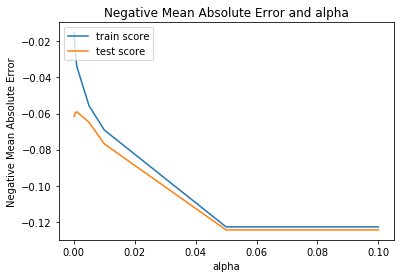

In [195]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [196]:
lasso_cv.best_score_

-0.059024348265085035

In [197]:
lasso_cv.best_params_

{'alpha': 0.001}

<font color = 'red'>

### Optimal value of lambda for lasso regression is 0.001

In [198]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [199]:
lasso.coef_

array([ 0.        , -0.00093965, -0.        ,  0.        ,  0.        ,
        0.        ,  0.1333055 ,  0.10875589, -0.        ,  0.03287498,
        0.        , -0.        ,  0.        ,  0.        ,  0.06245831,
       -0.        , -0.        ,  0.        ,  0.        ,  0.0142976 ,
       -0.        ,  0.        ,  0.00684932,  0.        , -0.        ,
        0.00617976,  0.        ,  0.08407795,  0.09499561, -0.02958523,
        0.        ,  0.        , -0.        ,  0.        , -0.02889083,
        0.        ,  0.12151325, -0.        , -0.        , -0.        ,
        0.        , -0.00895255,  0.14612341,  0.01563472,  0.00809894,
        0.02076965, -0.        ,  0.        ,  0.        ,  0.        ,
       -0.01171155, -0.        , -0.00554154,  0.        , -0.06090799,
        0.        ,  0.0062252 , -0.        ,  0.        ,  0.        ,
       -0.        , -0.05643529,  0.        ,  0.        , -0.        ,
        0.00924242,  0.        ,  0.02521446, -0.        , -0.  

In [200]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
var_selected = sum(coef != 0)
print('Lasso has selected {} variables'.format(var_selected))

Lasso has selected 44 variables


In [201]:
# Best variables predicting housing prices as per Lasso Regression
main_coef = pd.concat([coef.sort_values().head(10),
                       coef.sort_values().tail(10)])

main_coef.sort_values(ascending=False)

LandSlope_Mod           0.146123
OverallQual             0.133306
LandContour_Low         0.121513
OverallCond             0.108756
TotalSF                 0.094996
TotalBaths              0.084078
GrLivArea               0.062458
SaleCondition_Normal    0.051360
BsmtFinSF1              0.032875
Exterior1st_BrkFace     0.026616
Exterior1st_HdBoard    -0.017609
KitchenQual_TA         -0.020882
ExterCond_Gd           -0.027528
LotShape_Reg           -0.028891
House_Age              -0.029585
Exterior1st_WdShing    -0.038582
BsmtExposure_No        -0.048033
BldgType_2fmCon        -0.056435
Neighborhood_OldTown   -0.060908
SaleCondition_Family   -0.108463
dtype: float64

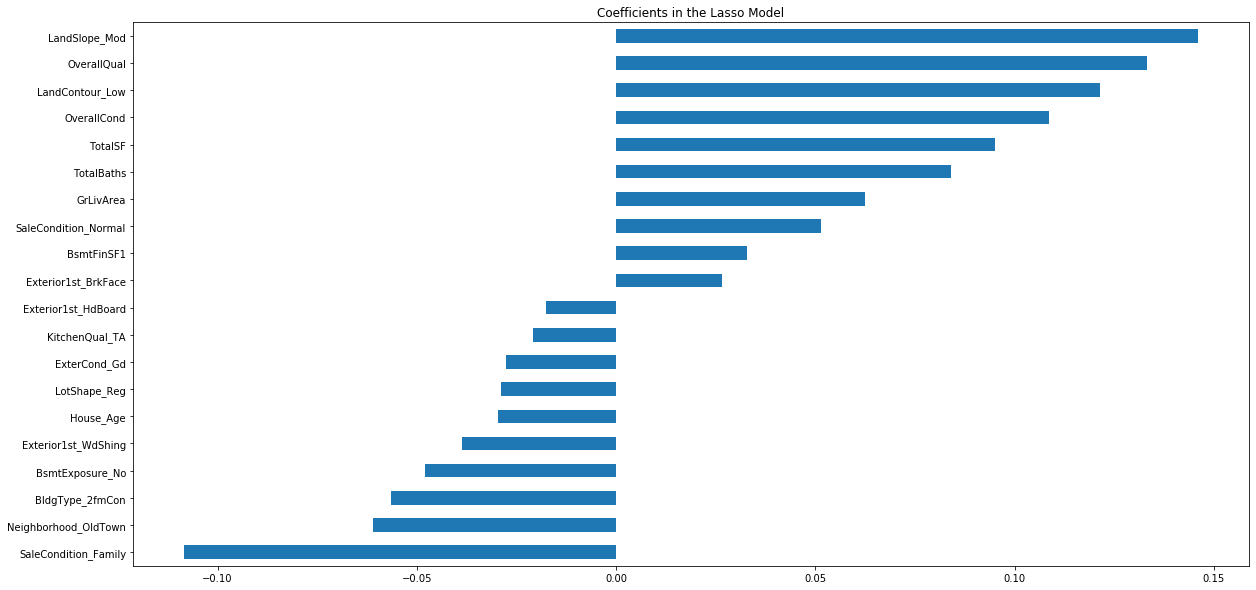

In [202]:
# Plotting the variables
plt.figure(figsize = (20,10))

main_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

plt.show()

<font color = 'blue'>

## Inputs from Lasso Regression

Most significant in House price prediction. 


With the increase of below Variables, sales price increases 

    1. Top Priority is given for Moderate Slope     
    2. Overall Quality 
        . 10 Very Excellent
        . 9 Excellent
        . 8 Very Good        
    3. LandContour with Low Depression    
    4. Total Square Feet of House
    5. Total Number of Baths
    6. GrLivArea -  Above grade (ground) living area square feet


With the increase of below variables, sales price decreases
    
    1. SaleCondition Family -  Sale between family members
    2. Neighborhood OldTown
    3. BldgType2FmCon - Two-family Conversion; originally built as one-family dwelling
    4. BsmtExposure_No
    5. Exterior1st_WdShing - Wood Shingles

<font color ='brown'>

# Conclusion 

Sales Price Increases with the increase of below Independent Variable from Ridge & Lasso 

       ** Ridge Regression                                                 ** Lasso Regression
    
    1. Top Priority is given for Overall Cond                        1. Top Priority is given for Moderate Slope 
       . 10 Very Excellent                                           2. Overall Quality 
       . 9 Excellent                                                       . 10 Very Excellent
       . 8 Very Good                                                       . 9 Excellent 
    2. Total Square Feet of House                                          . 8 Very Good                            
    3. GrLivArea -  Ground living area sq feet                       3. LandContour with Low Depression 
    4. OverallQual                                                   4. Total Square Feet of House
       . 10 Very Excellent                                           5. Total Number of Baths
       . 9 Excellent                                                 6. GrLivArea -  Ground living area sq feet 
       . 8 Very Good 
    5. Landslope Moderate


Sales Price decreases with the increase of below Independent Variable from Ridge & Lasso

       ** Ridge Regression                                                 ** Lasso Regression

    1. SaleCondition Family                                                1. SaleCondition Family 
    2. BldgType2FmCon                                                      2. Neighborhood OldTown
    3. BsmtExposure_No                                                     3. BldgType2FmCon
    4. Neighborhood OldTown                                                4. BsmtExposure_No
    5. Exterior1st_WdShing                                                 5. Exterior1st_WdShing

<font color ='blue'>
It is clearly visible that both Ridge and Lasso gave same variables in  top 5 category. But preference is Lasso Model as it reduced the number of variable to 44 because of its feature selection.

                                   --------  The End ---------